In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import scipy.io
from scipy.stats import skew, kurtosis
import os
plt.style.use('./custom_latex_style.mplstyle')
# if not os.path.exists('figures'):
#    os.makedirs('figures')
#    print(' The folder ''figures'' is created')
# else:
#     print(' The folder ''figures'' already exists')
   

In [3]:
data= scipy.io.loadmat('Data_for_excercise_v2.mat')

u = np.squeeze(np.array(data['u']))
v = np.squeeze(np.array(data['v']))
w = np.squeeze(np.array(data['w']))
time = np.squeeze(np.array(data['t']))


# Remove NaNs if necessary
indNaN = np.argwhere(~np.isnan(np.mean(u,1)))
indNaN = indNaN[:,0]
time = time[indNaN]
v = v[indNaN,:]
w = w[indNaN,:]
u = u[indNaN,:]

# Get the number of sensors and time step
Nsensors = u[0,:].size
N = u[:,0].size

Q2:

In [4]:
dt=time[1]-time[0]     #sampling time
fs=1/dt      #sampling frequency
f0=1/(time[-1]-time[0])   #lowest frequency
fnyq= fs/2   #highest frequency, Nyquist 

print("The sampling time is {:.2f} s".format(dt))
print("The sampling frequency is {:.2f} Hz".format(fs))
print("The lowest frequency is {:.5f} Hz".format(f0))
print("The highest frequency is {:.2f} Hz".format(fnyq))

The sampling time is 0.20 s
The sampling frequency is 5.00 Hz
The lowest frequency is 0.00031 Hz
The highest frequency is 2.50 Hz


Oppgave 3

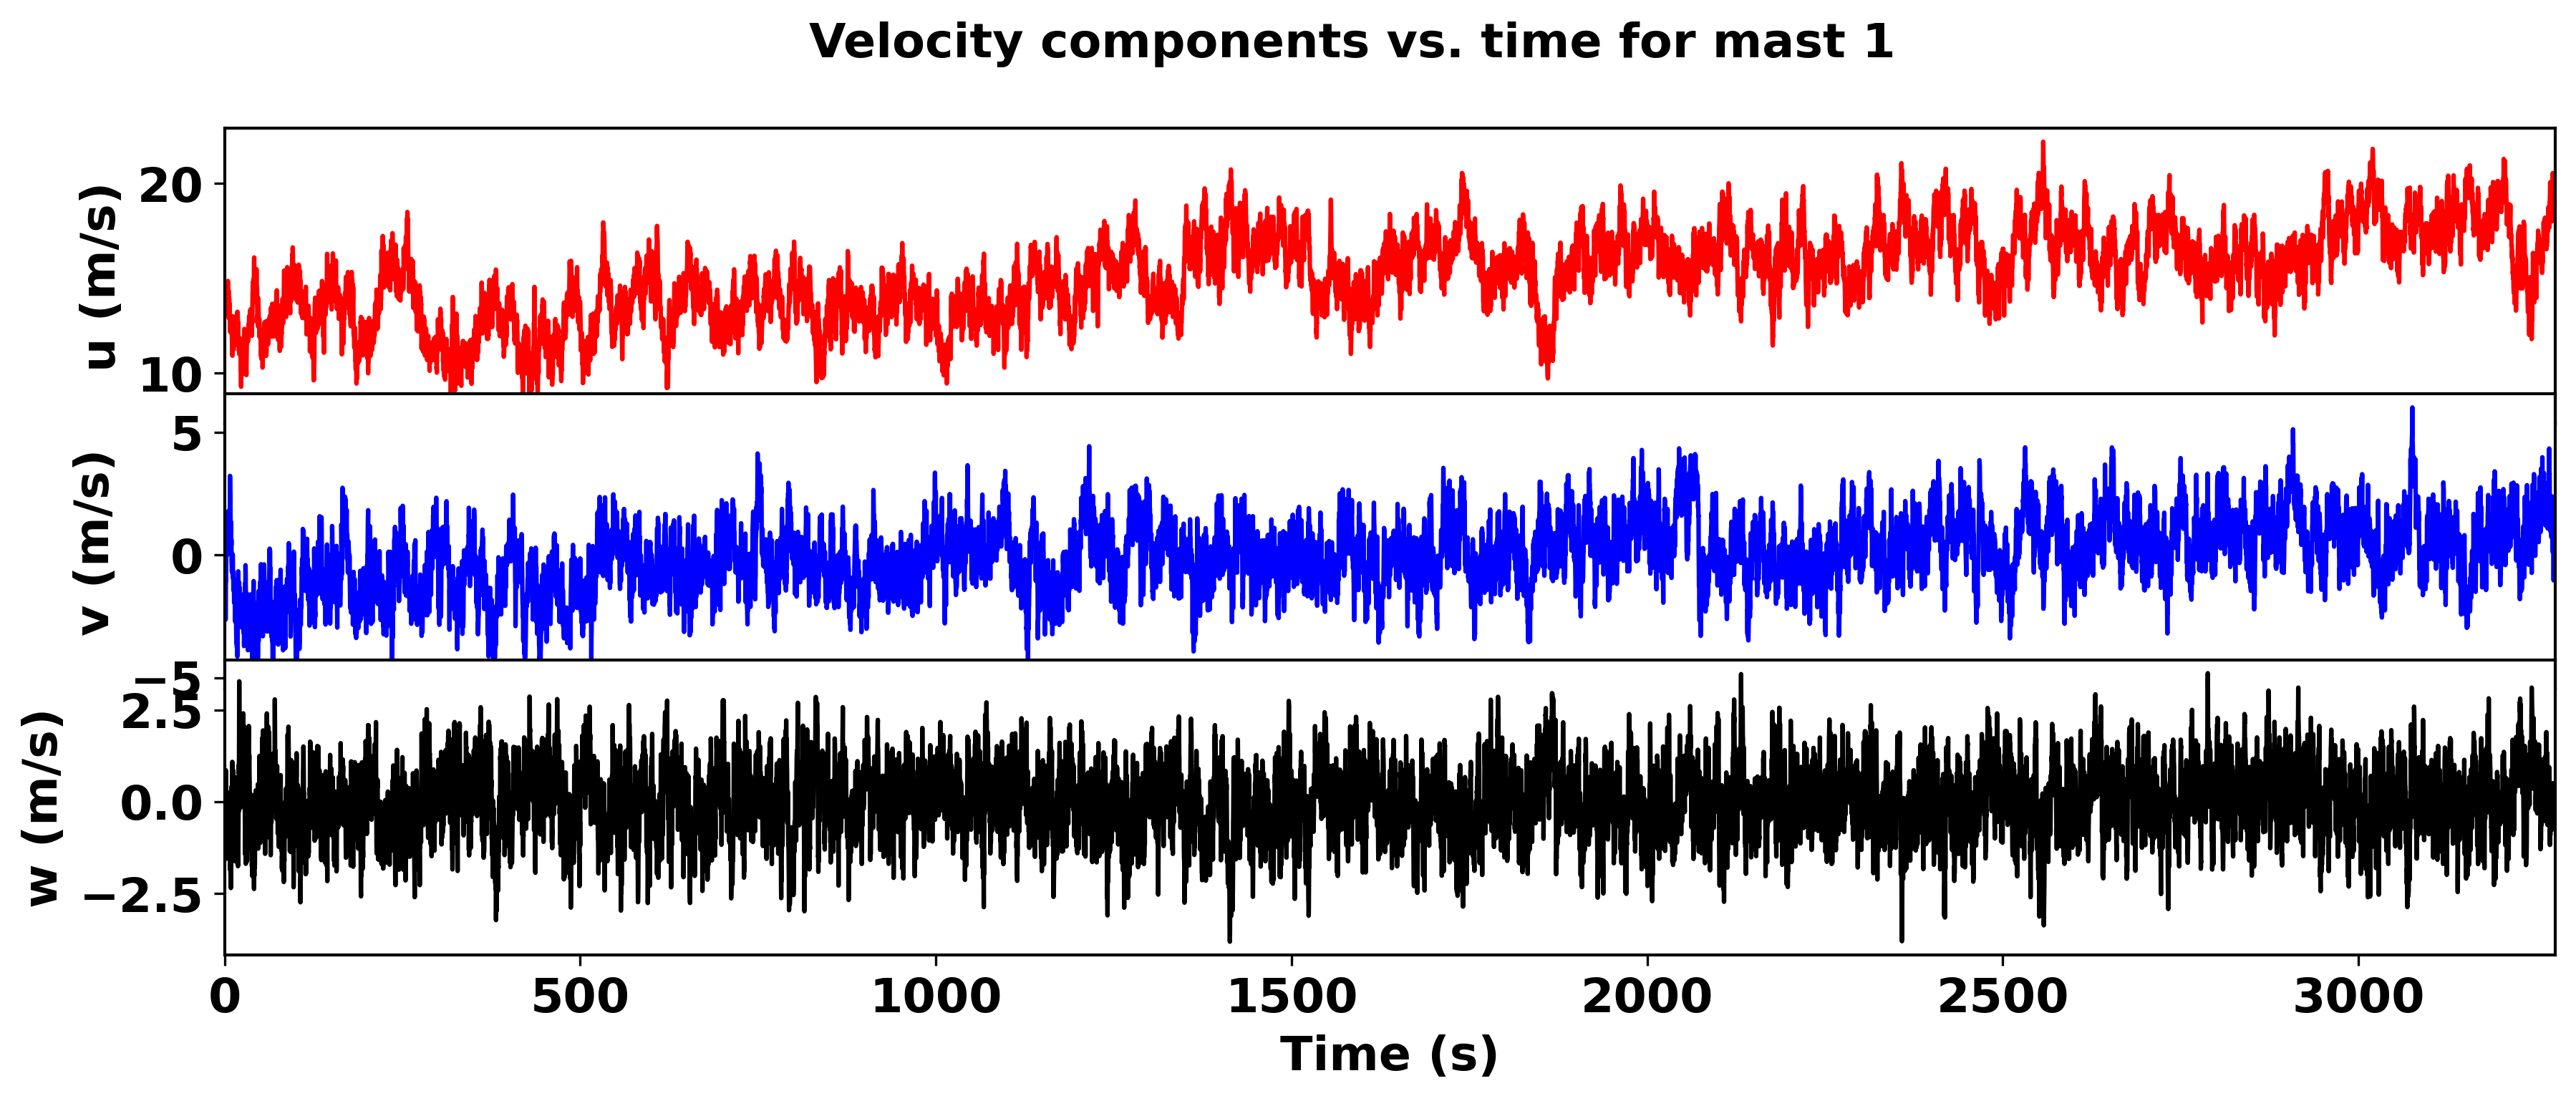

In [5]:
fig, axs = plt.subplots(3, 1, figsize=[14,5], sharex=True)

axs[0].plot(time, u[:,0],'r')
axs[0].set_ylabel('u (m/s)')
axs[0].set_xlim(min(time), max(time))

axs[1].plot(time, v[:,0],'b')
axs[1].set_ylabel('v (m/s)')

axs[2].plot(time, w[:,0],'k')
axs[2].set_ylabel('w (m/s)')
axs[2].set_xlabel('Time (s)')

# Set a common title
fig.suptitle('Velocity components vs. time for mast 1')
plt.subplots_adjust(hspace=-0.1) 
plt.savefig(os.path.join('figures', "velocitytime.jpg"))                                 

In [6]:
Nwindow=round(300*(1/dt))
Nwindow

1500

In [7]:
Rsult=[]
Er1=[]
Er2=[]

for i in range(0,5):
    stas = stationaryTest(u[:,i],time,Nwindow,0.2,0.4, np.mean(u[:,i]))
    Er1.append(stas[0])
    Er2.append(stas[1])
    Rsult.append(stas[2])

print(Rsult)
print(Er1)
print(Er2)

[1, 1, 1, 1, 1]
[0.19604856240933066, 0.19607302398776094, 0.18439775193306762, 0.18550391247226627, 0.18737664396531262]
[0.4609021775796248, 0.44828670219357725, 0.42835648369751045, 0.4558515087177124, 0.4244559045402462]


In [8]:
u_detrend= remove_linear_trend(u[:,0])
stationaryTest(u_detrend,time,Nwindow,0.2,0.4,np.mean(u_detrend))

(0.09004034869173627, 0.26750422842866617, 0)

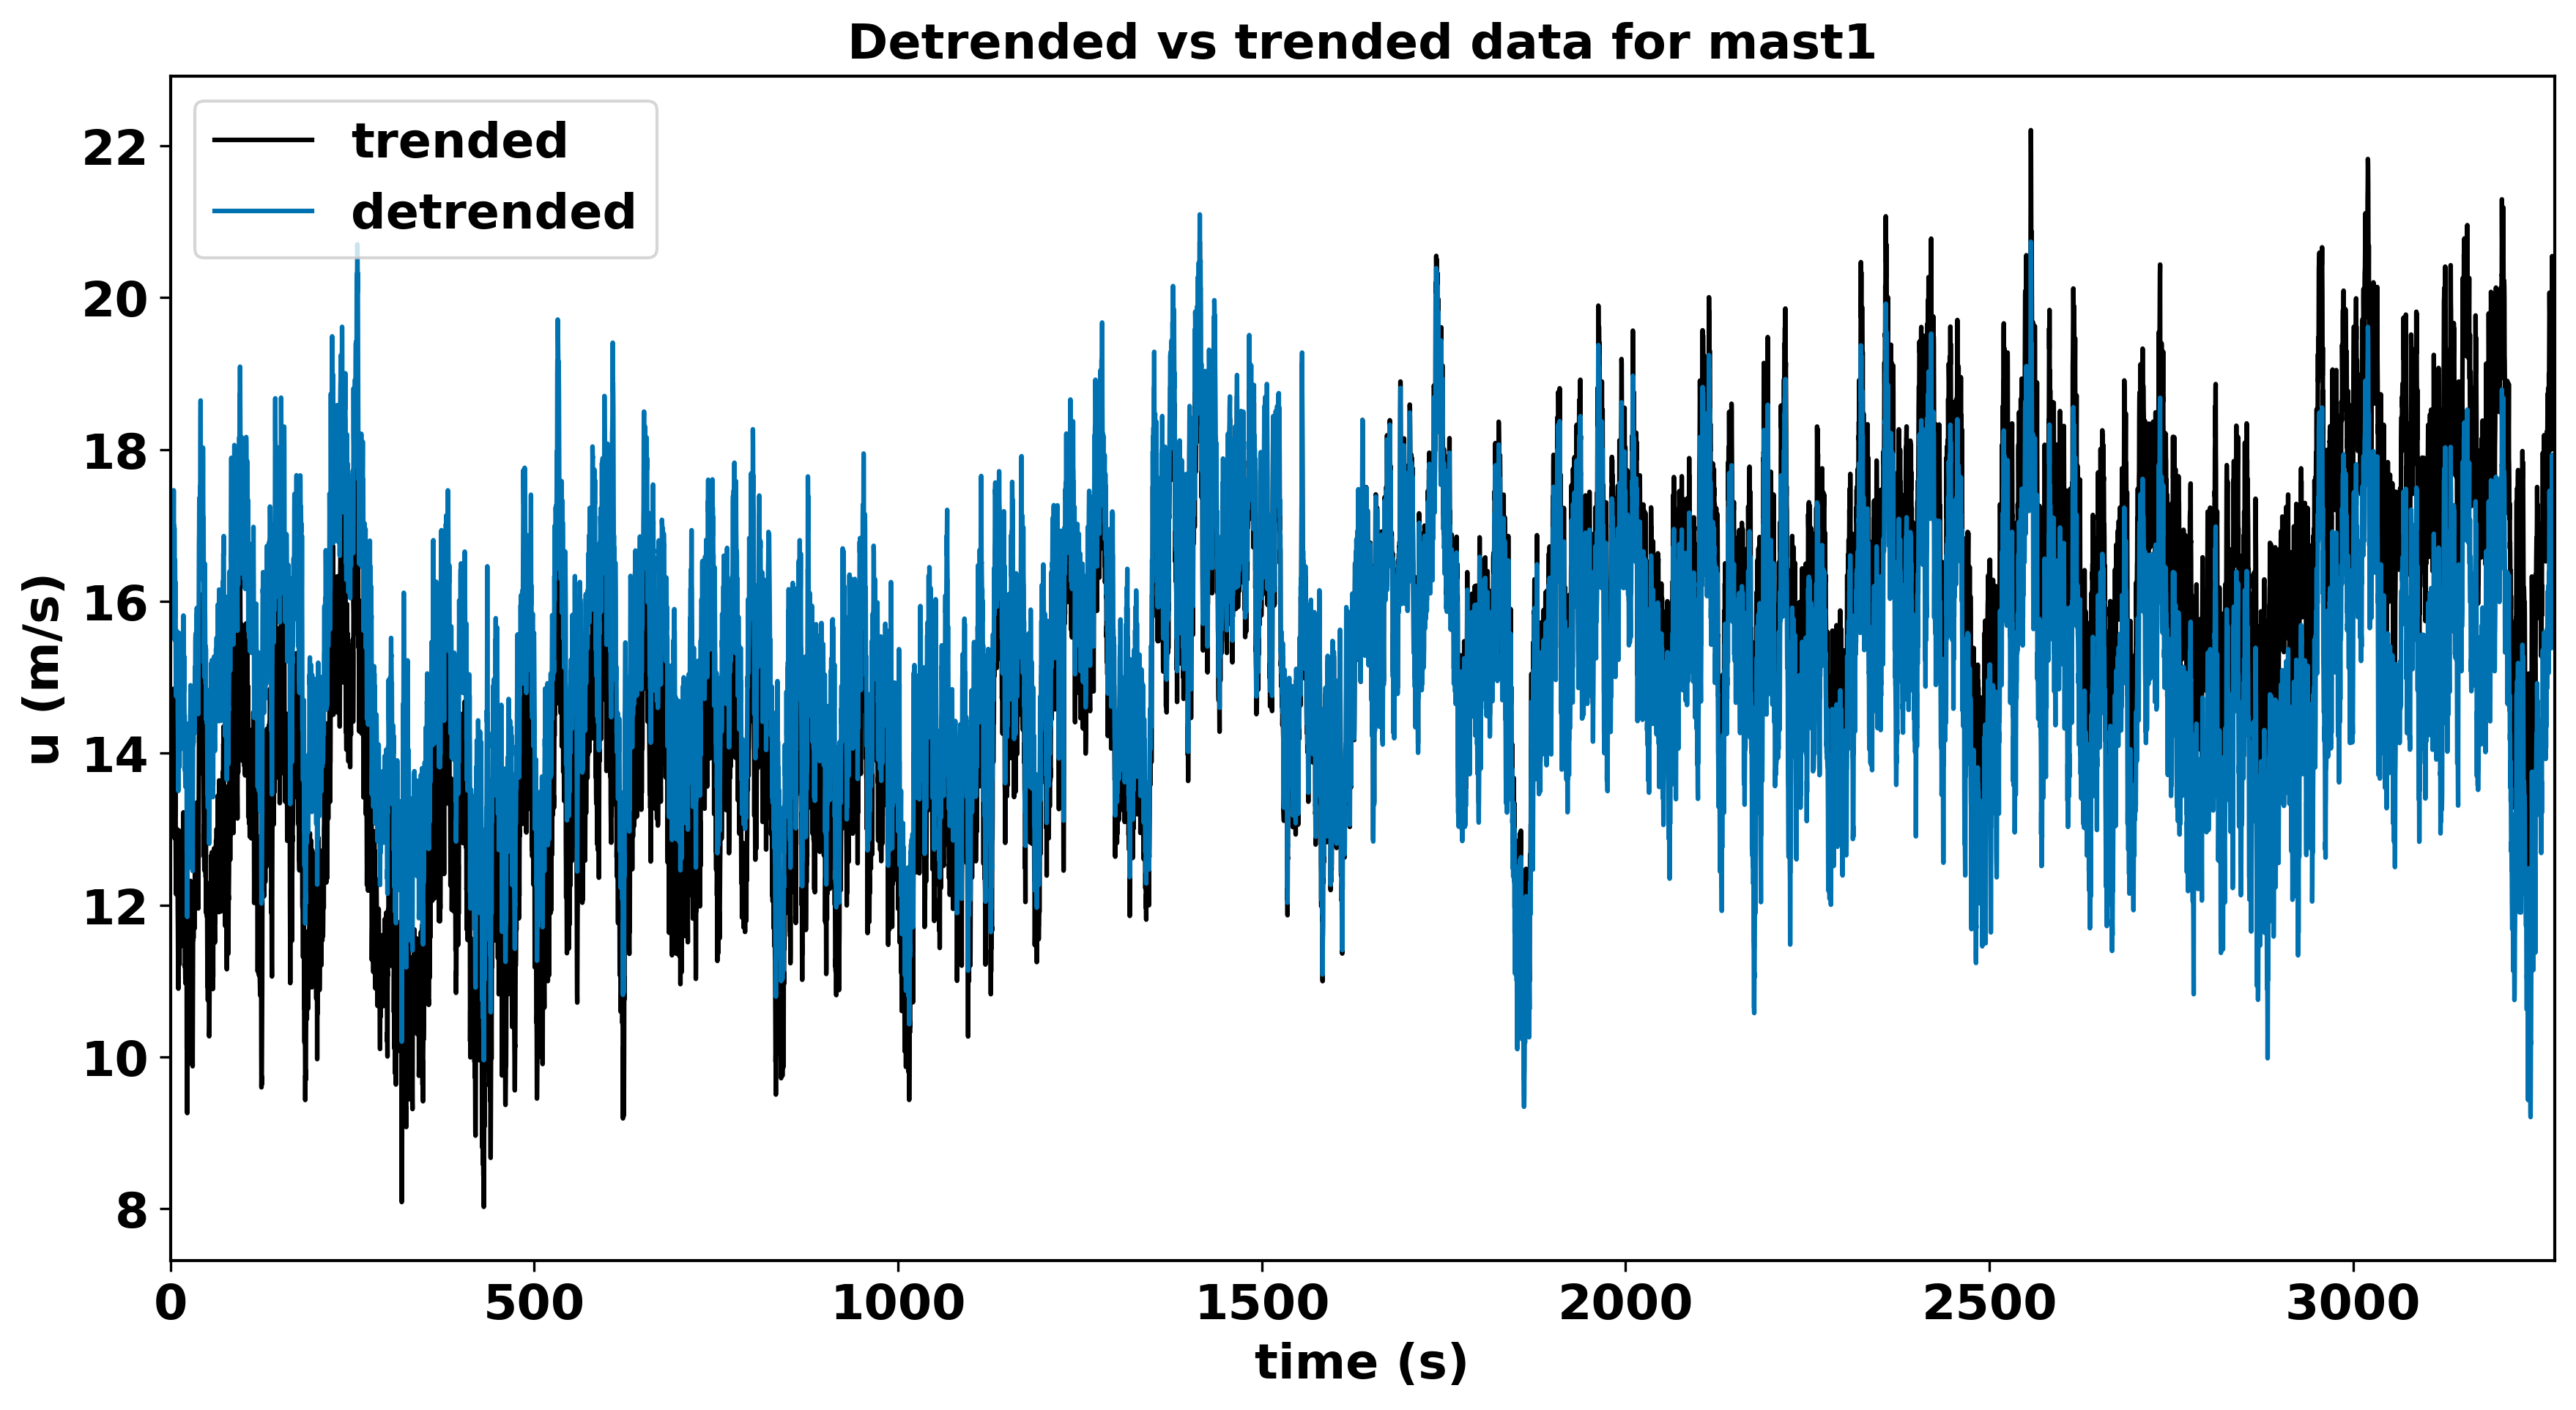

In [9]:
plt.figure(figsize=(14,7))
plt.title('Detrended vs trended data for mast1')
plt.plot(time,u[:,0],'k',label='trended')
plt.plot(time,u_detrend, label='detrended')
plt.xlabel('time (s)')
plt.xlim(time[0],time[-1])
plt.ylabel('u (m/s)')
plt.legend()
plt.savefig(os.path.join('figures', "detrendtrend.jpg"))  

Q4:

In [10]:
# detrend all data
u_de=np.zeros((16384, 5))
v_de=np.zeros((16384, 5))
w_de=np.zeros((16384, 5))
for i in range(0,5):
    u_de[:,i]=remove_linear_trend(u[:,i])
    v_de[:,i]=remove_linear_trend(v[:,i])
    w_de[:,i]=remove_linear_trend(w[:,i])

In [11]:
Rsults=[]
Ers1=[]
Ers2=[]

for i in range(0,5):
    stass = stationaryTest(u_de[:,i],time,Nwindow,0.2,0.4, np.mean(u_de[:,i]))
    Ers1.append(stass[0])
    Ers2.append(stass[1])
    Rsults.append(stass[2])

print(Rsults)
print(Ers1)
print(Ers2)

[0, 0, 0, 0, 0]
[0.09004034869173627, 0.08806794380515948, 0.08370207447314537, 0.08764169723075299, 0.08682224634812319]
[0.26750422842866617, 0.25783663404849055, 0.2213159222362202, 0.2675972815082237, 0.23458240152485144]


In [12]:
u1_skew=skew(u_de[:,0])
v1_skew=skew(v_de[:,0])
w1_skew=skew(w_de[:,0])
u1_kurt=kurtosis(u_de[:,0],fisher=False)
v1_kurt=kurtosis(v_de[:,0],fisher=False)
w1_kurt=kurtosis(w_de[:,0],fisher=False)
print("Skewness:", u1_skew,v1_skew,w1_skew)
print("Kurtosis:", u1_kurt,v1_kurt,w1_kurt)

Skewness: -0.014061094812800407 0.06705063943135424 -0.014330119771796181
Kurtosis: 2.9670377766788922 2.9856241405586457 3.006138369354877


Q5:

In [42]:
u_skew=[]
v_skew=[]
w_skew=[]
u_mean=[]
v_mean=[]
w_mean=[]
u_turb=[]
v_turb=[]
w_turb=[]
u_kurt=[]
v_kurt=[]
w_kurt=[]

for i in range(0,5):
    u_skew.append(skew(u_de[:,i]))
    v_skew.append(skew(v_de[:,i]))
    w_skew.append(skew(w_de[:,i]))
    u_mean.append(np.mean(u[:,i]))
    v_mean.append(np.mean(v[:,i]))
    w_mean.append(np.mean(w[:,i]))
    u_turb.append(np.std((u_de[:,i]))/np.mean(u[:,i]))
    v_turb.append(np.std((v_de[:,i]))/np.mean(u[:,i]))
    w_turb.append(np.std((w_de[:,i]))/np.mean(u[:,i]))
    u_kurt.append(kurtosis(u_de[:,i],fisher=False))
    v_kurt.append(kurtosis(v_de[:,i],fisher=False))
    w_kurt.append(kurtosis(w_de[:,i],fisher=False))


print("Spatial average of mean(u) is {:.2f} m/s".format(np.mean(u_mean)),"+/- {:.2f} m/s".format(np.std(u_mean)))
print("Spatial average of turbulence intensity(u) is {:.2f} m/s".format(np.mean(u_turb)),"+/- {:.2f} ".format(np.std(u_turb)))
print("Spatial average of skewness(u) is {:.2f} ".format(np.mean(u_skew)),"+/- {:.2f} ".format(np.std(u_skew)))
print("Spatial average of kurtosis(u) is {:.2f} ".format(np.mean(u_kurt)),"+/- {:.2f} ".format(np.std(u_kurt)))


print("Spatial average of mean(v) is {:.2f} m/s".format(np.mean(v_mean)),"+/- {:.2f} m/s".format(np.std(v_mean)))
print("Spatial average of turbulence intensity(v) is {:.2f} m/s".format(np.mean(v_turb)),"+/- {:.2f} ".format(np.std(v_turb)))
print("Spatial average of skewness(v) is {:.2f} ".format(np.mean(v_skew)),"+/- {:.2f} ".format(np.std(v_skew)))
print("Spatial average of kurtosis(v) is {:.2f} ".format(np.mean(v_kurt)),"+/- {:.2f} ".format(np.std(v_kurt)))

print("Spatial average of mean(w) is {:.2f} m/s".format(np.mean(w_mean)),"+/- {:.2f} m/s".format(np.std(w_mean)))
print("Spatial average of turbulence intensity(w) is {:.2f} m/s".format(np.mean(w_turb)),"+/- {:.2f} ".format(np.std(w_turb)))
print("Spatial average of skewness(w) is {:.2f} ".format(np.mean(w_skew)),"+/- {:.2f} ".format(np.std(w_skew)))
print("Spatial average of kurtosis(w) is {:.2f} ".format(np.mean(w_kurt)),"+/- {:.2f} ".format(np.std(w_kurt)))


Spatial average of mean(u) is 15.20 m/s +/- 0.00 m/s
Spatial average of turbulence intensity(u) is 0.11 m/s +/- 0.00 
Spatial average of skewness(u) is -0.06  +/- 0.02 
Spatial average of kurtosis(u) is 3.05  +/- 0.08 
Spatial average of mean(v) is 0.00 m/s +/- 0.00 m/s
Spatial average of turbulence intensity(v) is 0.08 m/s +/- 0.00 
Spatial average of skewness(v) is 0.00  +/- 0.05 
Spatial average of kurtosis(v) is 3.02  +/- 0.07 
Spatial average of mean(w) is 0.00 m/s +/- 0.00 m/s
Spatial average of turbulence intensity(w) is 0.06 m/s +/- 0.00 
Spatial average of skewness(w) is -0.01  +/- 0.05 
Spatial average of kurtosis(w) is 2.98  +/- 0.08 


Q6:

In [41]:
R=np.zeros((3,3))
fricvel=[]
for i in range(0,5):
    fric=frictionVelocity(u[:,i],v[:,i],w[:,i])
    fricvel.append(fric[0])
    R+=fric[1]

R/=5
u_star=np.mean(fricvel)
print(R)



[[ 2.73705041 -0.03603794 -0.63714662]
 [-0.03603794  1.63430843  0.00915507]
 [-0.63714662  0.00915507  0.88939745]]
0.7745966692414834


Q7:

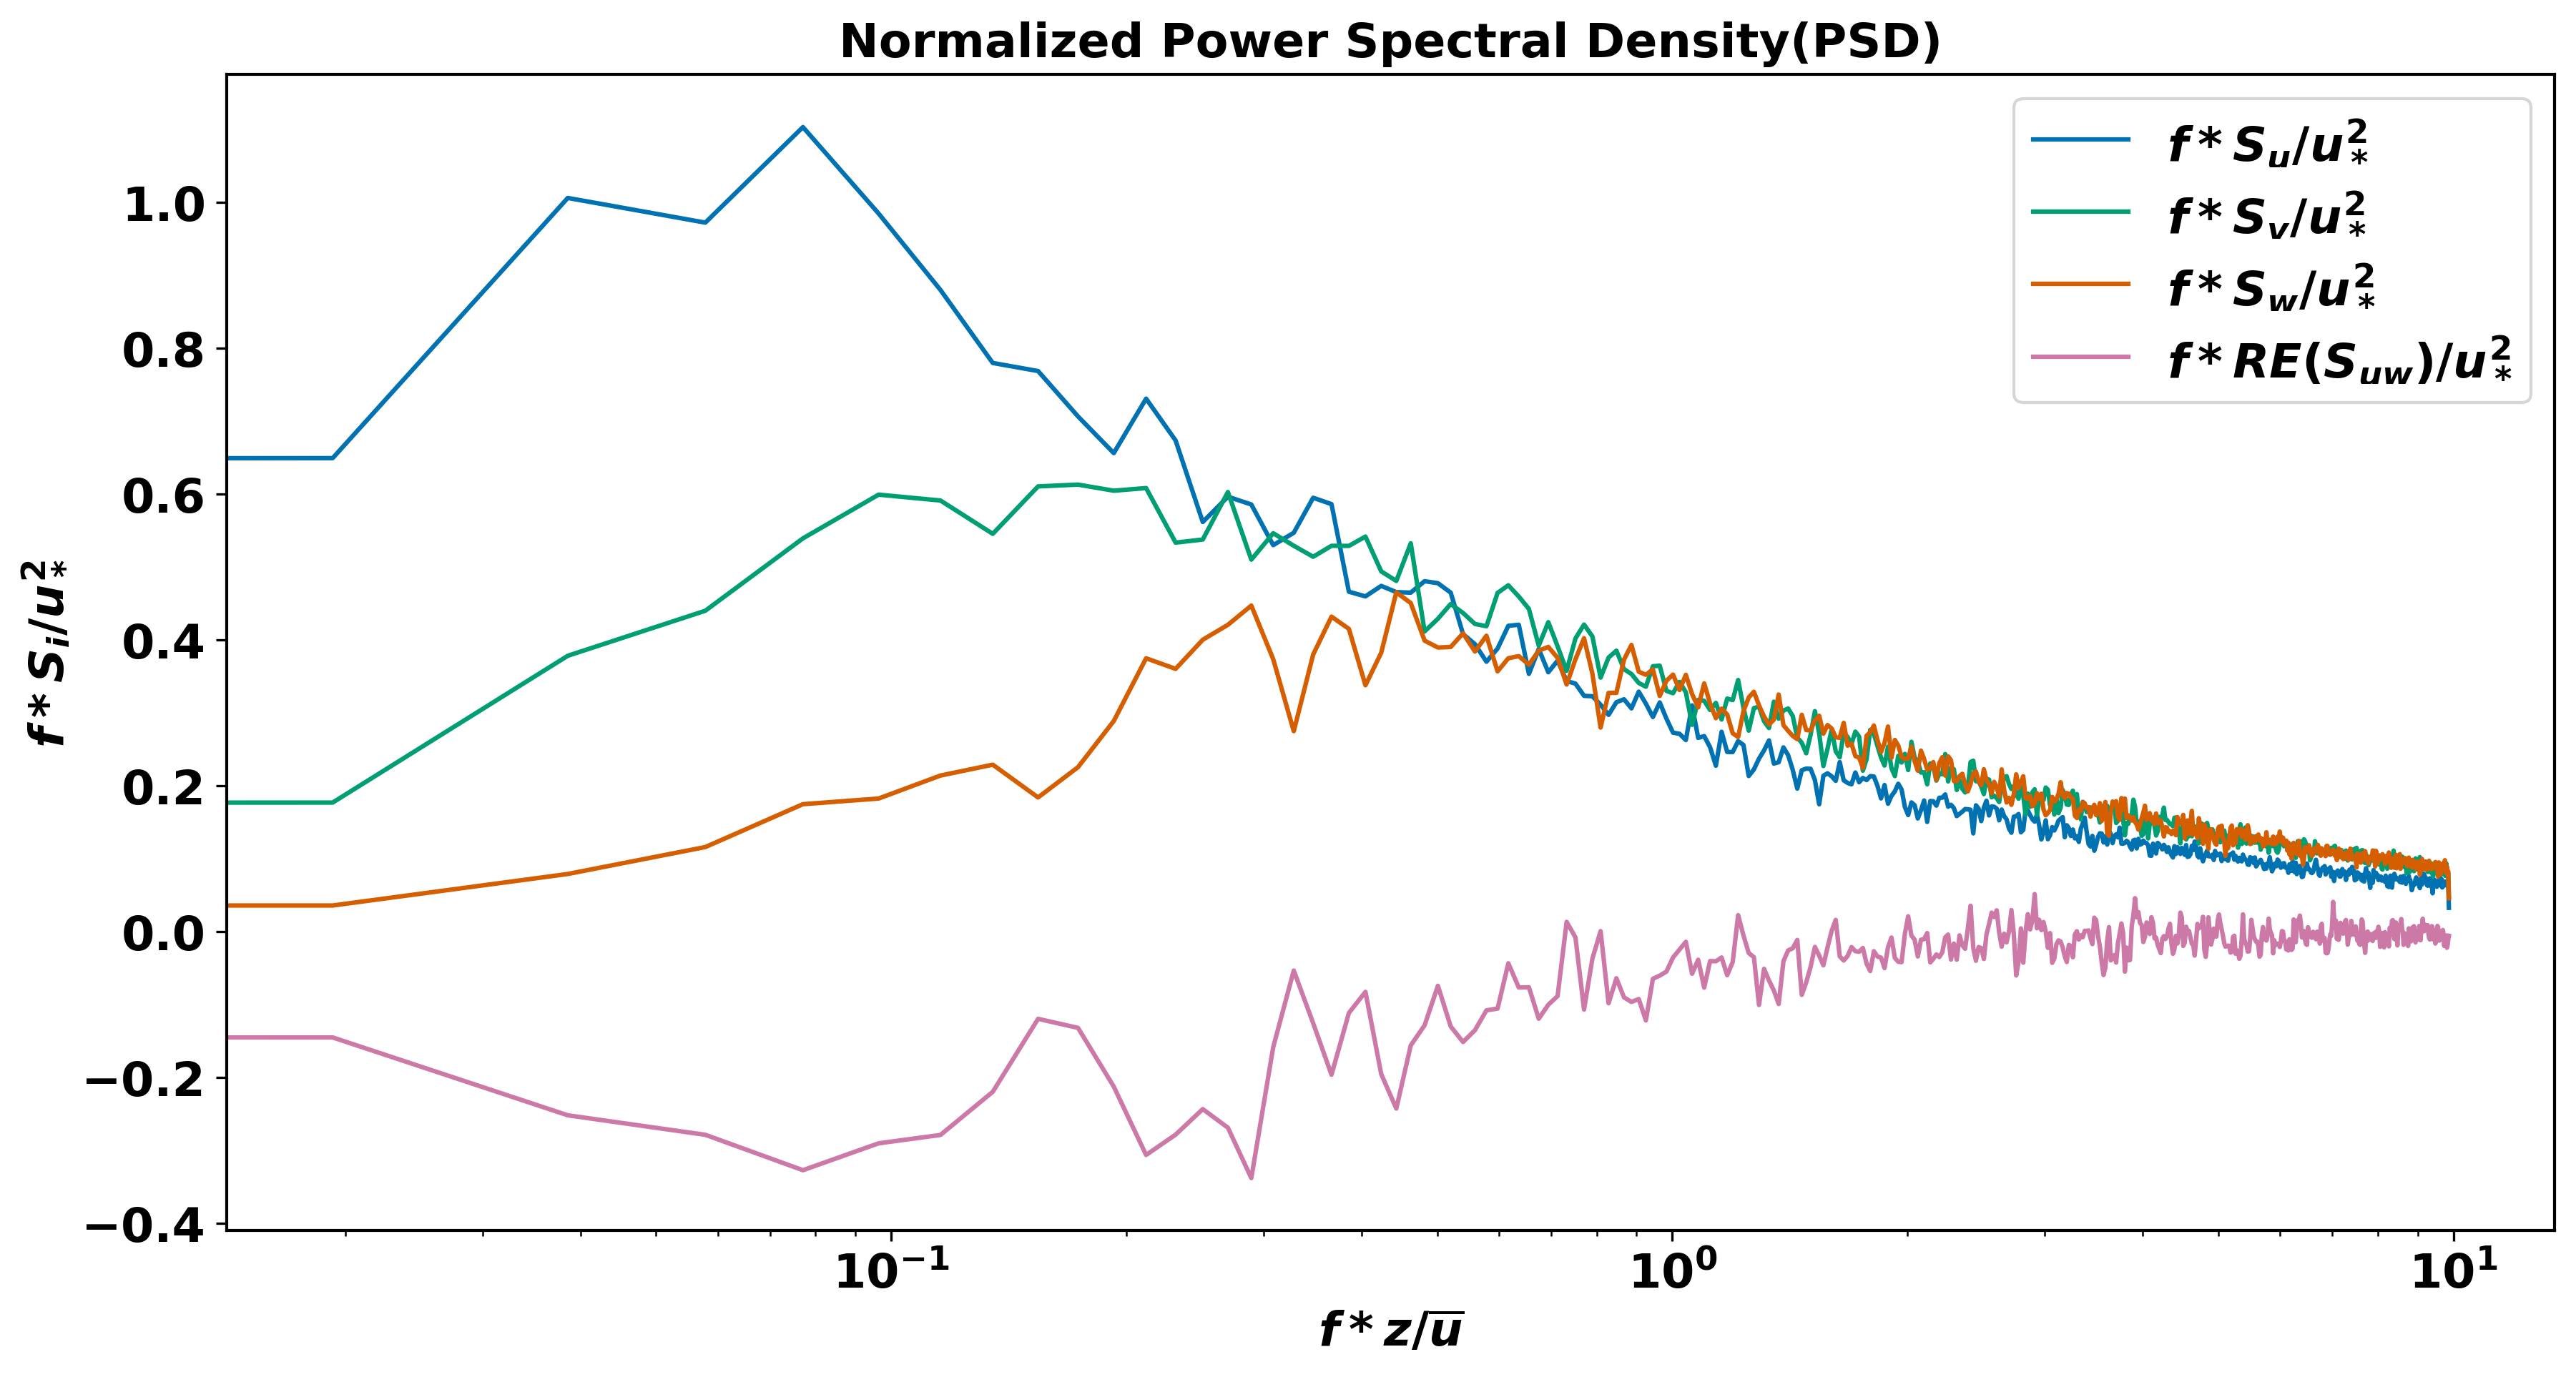

In [26]:
from scipy.signal import welch, csd

v_detrend= remove_linear_trend(v[:,0])
w_detrend= remove_linear_trend(w[:,0])

nperseg=N//16
noverlap=nperseg//2

frequencies1, spectrum1 = welch(u_detrend, fs=fs,nperseg=nperseg,noverlap=noverlap)
frequencies2, spectrum2 = welch(v_detrend, fs=fs,nperseg=nperseg,noverlap=noverlap)
frequencies3, spectrum3 = welch(w_detrend, fs=fs,nperseg=nperseg,noverlap=noverlap)
frequencies4, spectrum4= csd(u_detrend,w_detrend,fs=fs,nperseg=nperseg,noverlap=noverlap)

Su0 = (frequencies1*spectrum1)/((u_star)**2)
Sv0 = (frequencies2*spectrum2)/((u_star)**2)
Sw0 = (frequencies3*spectrum3)/((u_star)**2)
Suw0 = (frequencies4*np.real(spectrum4))/((u_star)**2)

fr=frequencies1*60/np.mean(u_detrend)

plt.figure(figsize=(14,7))
plt.title('Normalized Power Spectral Density(PSD)')
plt.semilogx(fr,Su0,label='$f*S_u/u^2_* $')
plt.semilogx(fr,Sv0,label='$f*S_v/u^2_* $')
plt.semilogx(fr,Sw0,label='$f*S_w/u^2_* $')
plt.semilogx(fr,Suw0,label='$f*RE(S_{uw})/u^2_* $')
plt.xlabel('$f*z / \overline{u}$')
plt.ylabel('$f*S_i/u^2_* $')
plt.legend()
plt.savefig(os.path.join('figures', "welch.jpg"))  

Q8:

C:\Users\astri\AppData\Local\Temp\ipykernel_30080\1510250385.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(fr,Sw0/Su0,'r',label='$S_w/S_u $')
C:\Users\astri\AppData\Local\Temp\ipykernel_30080\1510250385.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(fr,Sv0/Su0,'g',label='$S_v/S_u $')


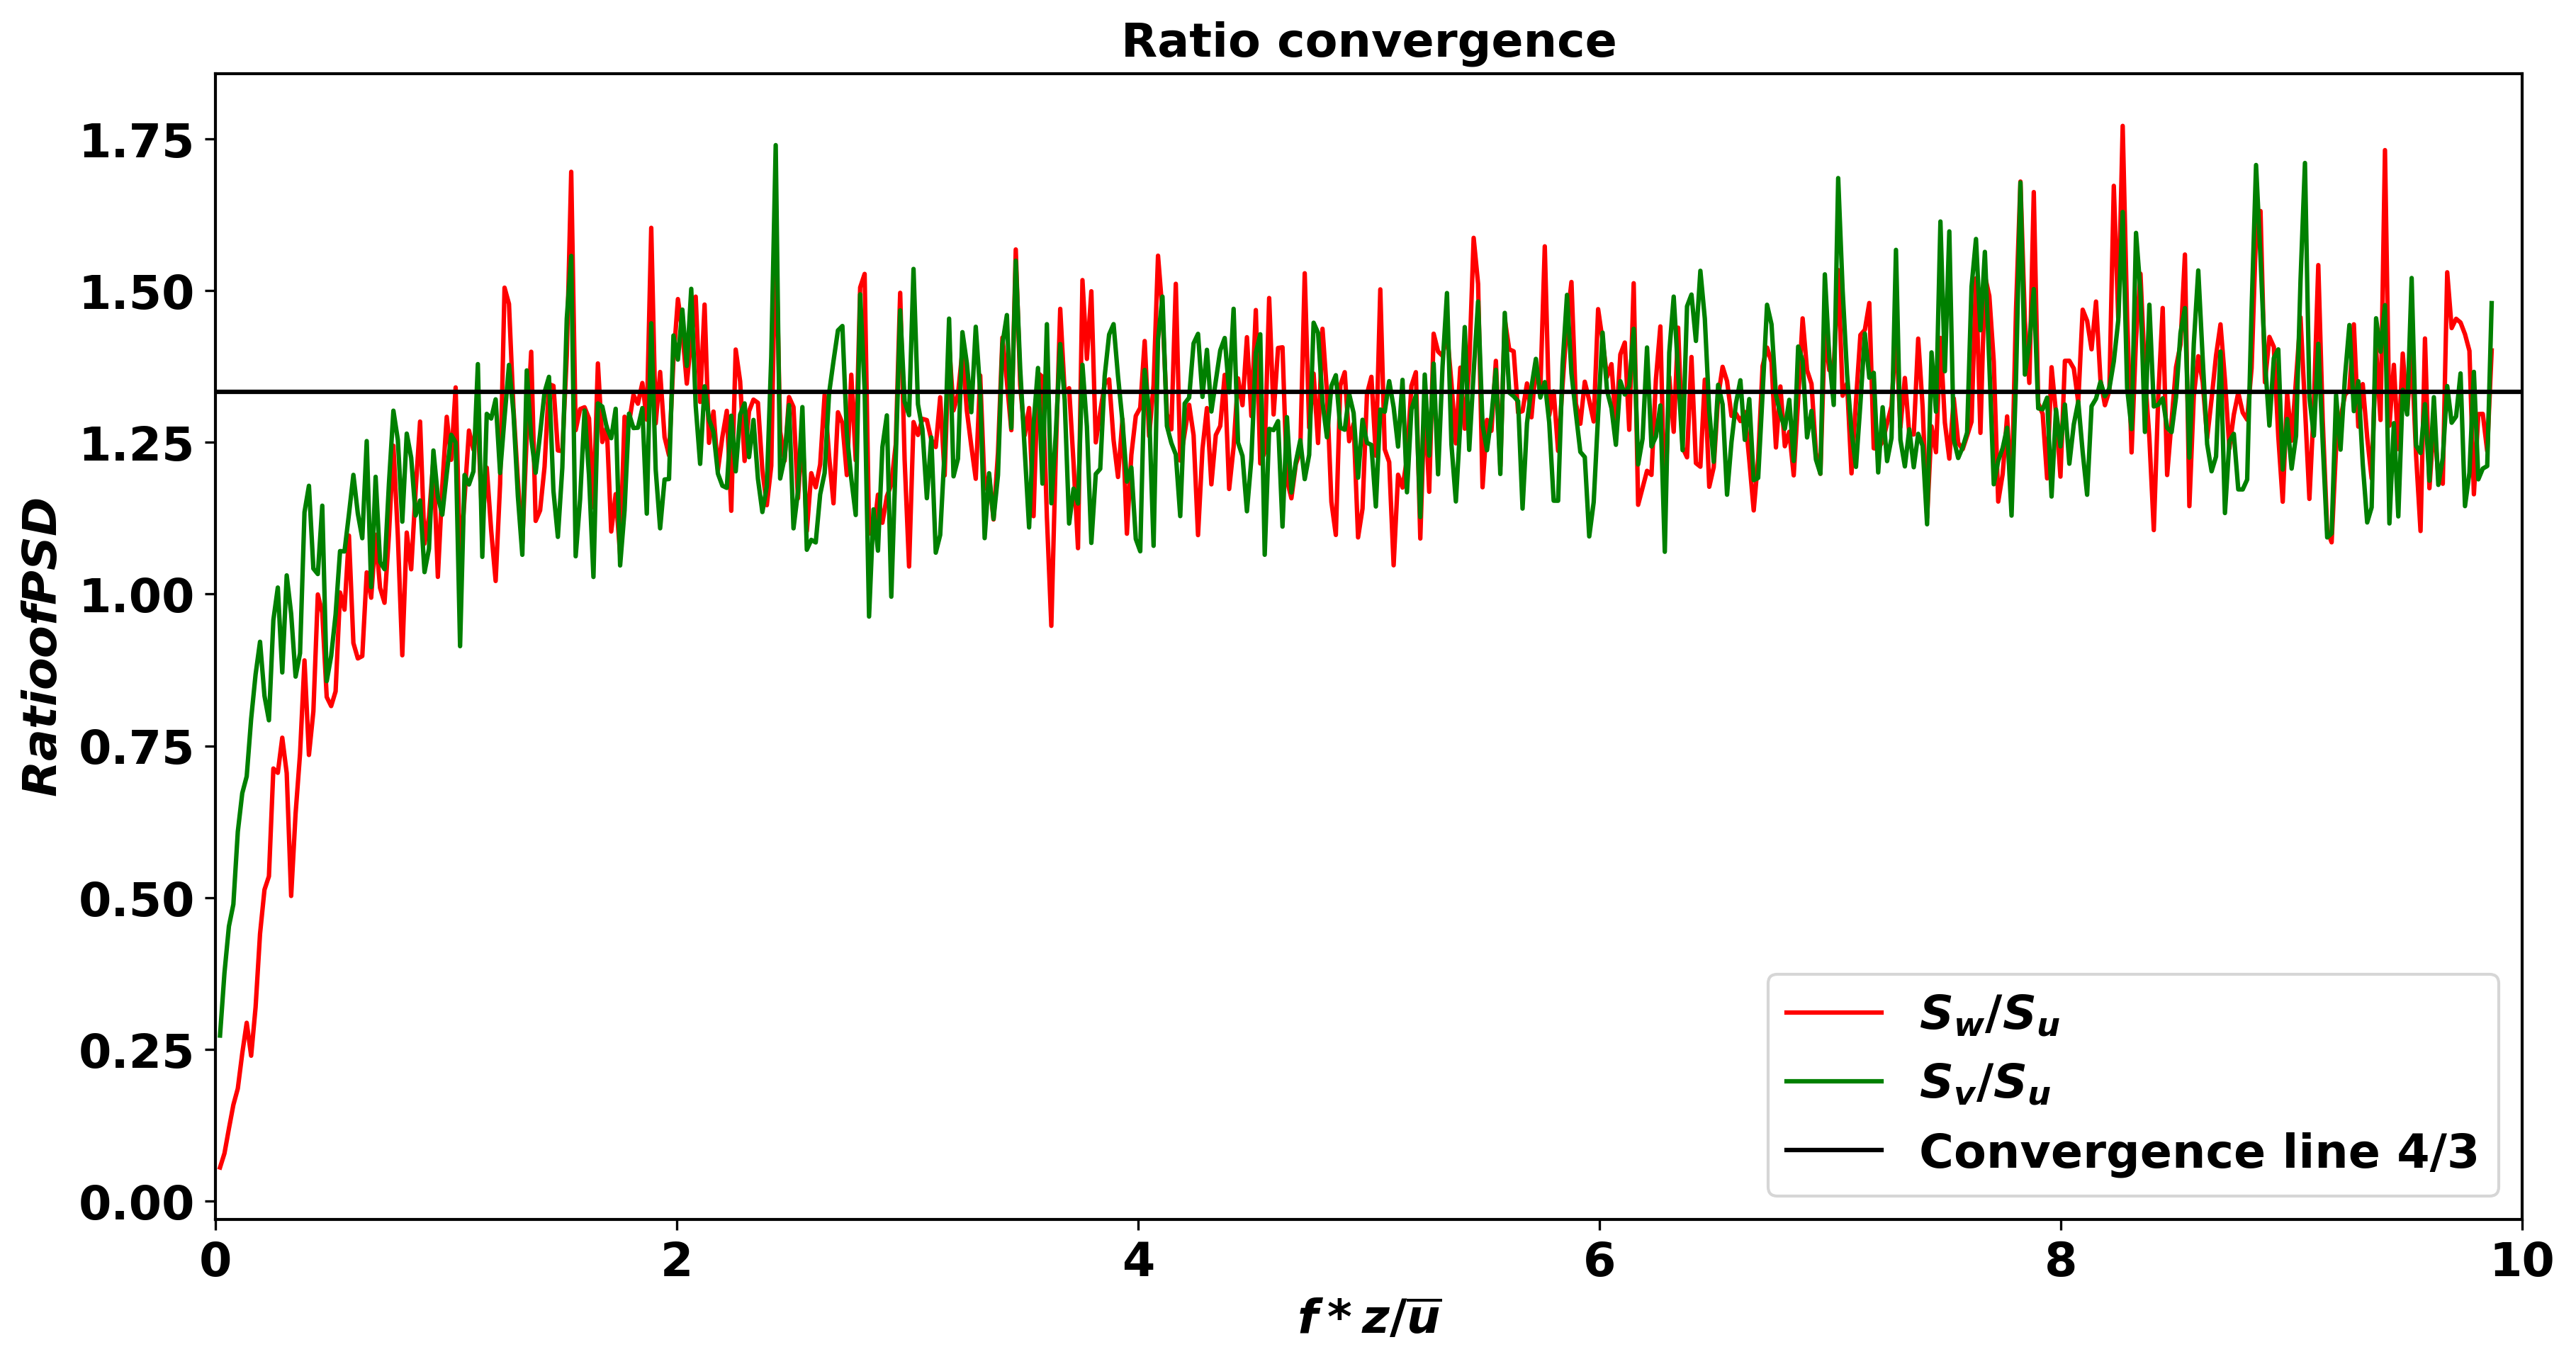

In [27]:
plt.figure(figsize=(14,7))
plt.title('Ratio convergence')
plt.plot(fr,Sw0/Su0,'r',label='$S_w/S_u $')
plt.plot(fr,Sv0/Su0,'g',label='$S_v/S_u $')
plt.plot((0,10),(4/3,4/3),'k',label='Convergence line 4/3')
plt.xlabel('$f*z / \overline{u}$')
plt.ylabel('$Ratio of PSD$')
plt.xlim(0,10)
plt.legend()
plt.savefig(os.path.join('figures', "konvergence.jpg"))  